# Averaging datasets for a better signal

In [1]:
%matplotlib inline

import sys
sys.path.append('./..')

import spectrum_fitting
from spectrum_fitting import PeakParams, MaximumParams

Sometimes it may be desirable or necessary to average the data to improve the signal to noise ratio. This means combining a signal from multiple cakes. First we must discuss some semantics about how the cakes are organised.

Each dataset describes the intensity of a scattering image. The circular scattering image is divided into sections called "cakes". Each spectrum is the intensity of the cake as a function of distance from the center of the scattering image (two theta angle)

<img src="images/cake_numbering.svg" alt="Illustration of cake numbering" title="Illustration of cake numbering" width="300" />
    
The cakes are ordered clockwise in the source data files but no information is provided about the location of the first cake. By convention the first cake in the data file is at 90&deg; from the vertical, however this may be different for your dataset and so you must provide the angle of the first cake as a parameter to this analysis.

In [2]:
starting_angle = 90
file_path = '../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat'

In the above example image there are 36 cakes. This number is again dependent on how the user captured the data. The number of cakes in your dataset is determined autmatically from the number of columns in the input dataset.

## Simple cake merging

In order to improve the quality of the analysed dataset we may want to average over multiple adjacent cakes to provide a better signal. The simplest way to do this is to add multiple cakes together. This will increase the peak height but will also increase the noise floor. Averaged data can be loaded by using a slightly different method to load data into the `FitSpectrum` object.

In [3]:
spectral_data = spectrum_fitting.FitSpectrum()
spectral_data.load_merged_spectrum(file_path, starting_angle, "top")

Spectrum successfully loaded from file.


The top parameter will take 3 cakes from the top of the scattering image, in this example case, cakes 27, 28 and 29. 
Valid averaging parameters are: "top", "bottom", "left", "right", "vertical" (top and bottom) and "vertical" (left and right).

<img src="images/averaging_areas.svg" width="400" />

The data is now loaded into the `FitSpectrum` object as before and all of the same functions can be used.

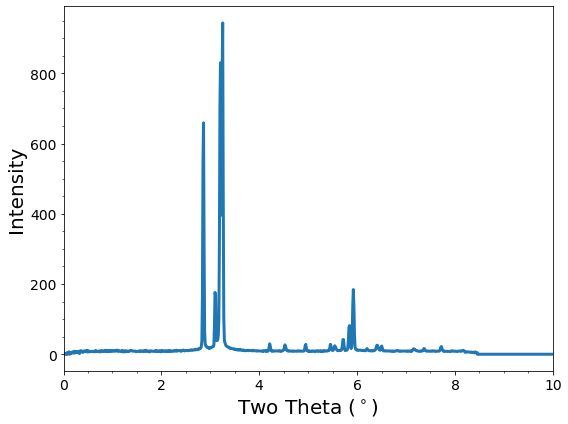

In [4]:
spectral_data.plot()

Notice how this compares to loading a single cake, the intensity is larger but otherwise the data looks much the same at this scale.

Spectrum successfully loaded from file.


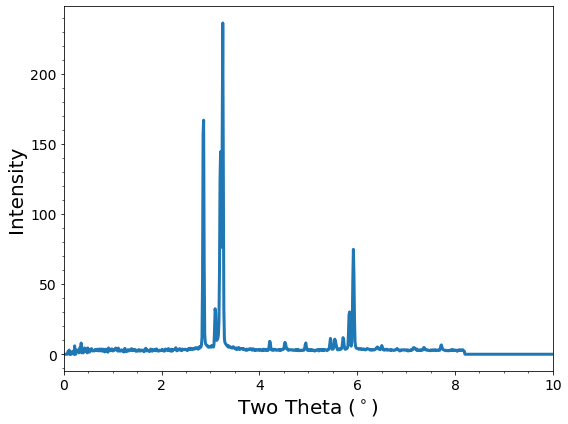

In [5]:
single_cake_spectrum = spectrum_fitting.FitSpectrum()
single_cake_spectrum.load_single_spectrum(file_path, cake = 28)
single_cake_spectrum.plot()